In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('HR-Employee-Attrition_Preprocessed.csv')
df_final = df.copy()
df.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,...,Age_bin,DistanceFromHome_bin,MonthlyIncome_bin,NumCompaniesWorked_bin,TotalWorkingYears_bin,TrainingTimesLastYear_bin,YearsAtCompany_bin,YearsInCurrentRole_bin,YearsSinceLastPromotion_bin,YearsWithCurrManager_bin
0,0.547619,1,1,0.000000,2,2,0,3,2,4,...,3,1,2,5,2,1,2,2,1,2
1,0.738095,0,2,0.250000,1,3,1,2,2,2,...,4,2,2,1,2,4,3,3,1,3
2,0.452381,1,1,0.035714,2,4,1,2,1,3,...,3,1,1,4,2,4,1,1,1,1
3,0.357143,0,2,0.071429,4,4,0,3,1,3,...,2,1,1,1,2,4,3,3,2,1
4,0.214286,0,1,0.035714,1,1,1,3,1,2,...,2,1,1,5,2,4,1,1,2,1


## Data Modeling
1. Split the dataset into two: one containing the binned continuous features, one with the original continuous features
2. Build the data model with 67% training and 33% testing

In [66]:
target_feature = 'Attrition'
desc_bin = []
desc_ori = []

cont_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 
                        'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 
                        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in df_final:
    if col not in cont_features:
        desc_bin.append(col)
    if '_bin' not in col:
        desc_ori.append(col)

desc_bin.pop(0)
desc_ori.pop(1)

print(desc_bin)
print(desc_ori)

['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'Age_bin', 'DistanceFromHome_bin', 'MonthlyIncome_bin', 'NumCompaniesWorked_bin', 'TotalWorkingYears_bin', 'TrainingTimesLastYear_bin', 'YearsAtCompany_bin', 'YearsInCurrentRole_bin', 'YearsSinceLastPromotion_bin', 'YearsWithCurrManager_bin']
['Age', 'BusinessTravel', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, Y_train, Y_test = train_test_split(df_final[desc_ori], df_final[target_feature],  
                                                    test_size=0.33, random_state=65)

## Data Evaluation

#### KNN

Max accuracy: 0.8395061728395061
K: 9


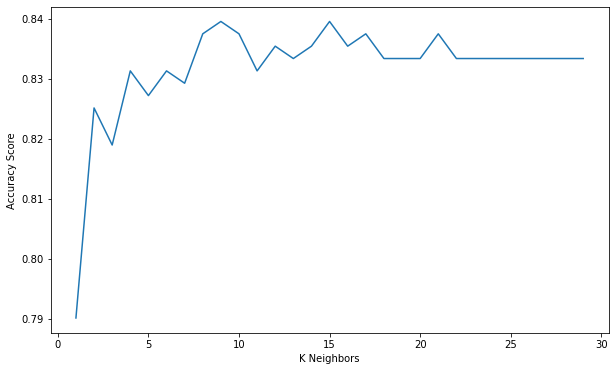

In [68]:
from sklearn.neighbors import KNeighborsClassifier

# Search for the best k
scores = []
for i in range(1, 30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, Y_train)
    y_pred = neigh.predict(X_test)
    scores.append(accuracy_score(Y_test, y_pred))

k = scores.index(max(scores)) + 1
plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), scores)
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy Score')

print('Max accuracy: {}'.format(max(scores)))
print('K: {}'.format(k))
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       405
           1       0.64      0.09      0.15        81

    accuracy                           0.84       486
   macro avg       0.74      0.54      0.53       486
weighted avg       0.81      0.84      0.78       486



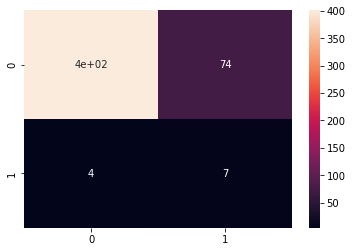

In [69]:
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X_train, Y_train)
y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True)

print(classification_report(Y_test, y_pred))

#### Random Forest

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       405
           1       0.57      0.15      0.24        81

    accuracy                           0.84       486
   macro avg       0.71      0.56      0.57       486
weighted avg       0.80      0.84      0.80       486



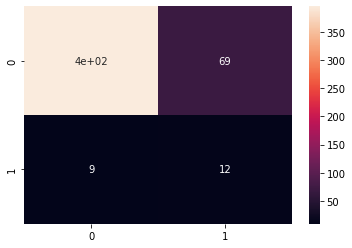

In [70]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)
y_pred = random_forest.predict(X_test)

cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True)

print(classification_report(Y_test, y_pred))

#### Naive Bayes

In [71]:
# For Categorical Naive Bayes, we need to use the binned version of the dataset

X_train, X_test, Y_train, Y_test = train_test_split(df_final[desc_bin], df_final[target_feature],  
                                                    test_size=0.33, random_state=65)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       405
           1       0.32      0.40      0.36        81

    accuracy                           0.76       486
   macro avg       0.60      0.61      0.60       486
weighted avg       0.78      0.76      0.77       486



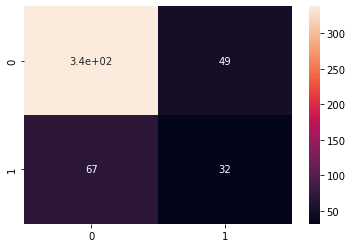

In [72]:
from sklearn.naive_bayes import CategoricalNB

catNB = CategoricalNB()
catNB.fit(X_train,Y_train)
y_pred = catNB.predict(X_test)

cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot=True)

print(classification_report(Y_test, y_pred))